**PANUTAD SIRIKUL**

**650510714**

# The Pegasos Algorithm
### Pegasos: Primal Estimated sub-GrAdient SOlver for SVM

Read: https://home.ttic.edu/~nati/Publications/PegasosMPB.pdf upto Section 2.1

**Shai Shalev-Shwartz · Yoram Singer · Nathan Srebro · Andrew Cotter**

**Abstract** We describe and analyze a simple and effective stochastic sub-gradient descent
 algorithm for solving the optimization problem cast by Support Vector Machines (SVM).
 Weprove that the number of iterations required to obtain a solution of accuracy ϵ is ˜
 O(1/ϵ),
 where each iteration operates on a single training example. In contrast, previous analyses of
 stochastic gradient descent methods for SVMs require Ω(1/ϵ2) iterations. As in previously
 devised SVM solvers, the number of iterations also scales linearly with 1/λ, where λ is
 the regularization parameter of SVM. For a linear kernel, the total run-time of our method
 is ˜ O(d/(λϵ)), where d is a bound on the number of non-zero features in each example.
 Since the run-time does not depend directly on the size of the training set, the resulting
 algorithm is especially suited for learning from large datasets. Our approach also extends to
 non-linear kernels while working solely on the primal objective function, though in this case
 the runtime does depend linearly on the training set size. Our algorithm is particularly well
 suited for large text classification problems, where we demonstrate an order-of-magnitude
 speedup over previous SVM learning methods.

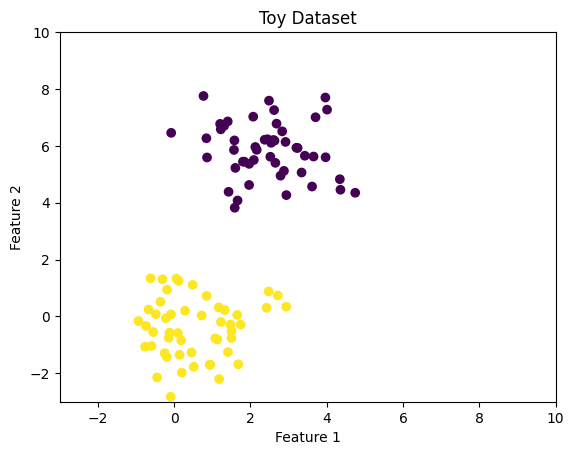

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate a 2D toy dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
X[y == 0] = X[y == 0] + 1.5
X[y == 1] = X[y == 1] - 1.5

# append column vector of ones to X
X = np.append(X, np.ones((X.shape[0], 1)), axis=1)

# adjust y to -1,1
y = y*2 - 1

# Visualize the dataset (optional)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlim((-3, 10))
plt.ylim((-3, 10))
plt.title('Toy Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### **Implement Pegasos Algorithm Fuction for SVM**

In [2]:
import random

def Pegasos(X, y, lambd, T):
    # Initialize vector w as zeros
    n_samples, n_features = X.shape
    w = np.zeros(n_features)

    # Iterate from 1 to T
    for t in range(1, T+1):
      # Choose i[t] ∈ {1,...,|X|} uniformly at random
      i = random.randint(0, n_samples - 1)

      # Set Learning Rate (eta will keep decreasing)
      eta = 1/(Lambd*t)

      # Compute condition y_i * <w, x_i> < 1
      if y[i] * np.dot(w, X[i]) < 1:
         w = (1 - eta * Lambd) * w + eta * y[i] * X[i] # Set update weights
      else: # (if y_i <w[t],x_i> >= 1):
         w = (1 - eta * Lambd) * w # Regularization step to make it to remain less than 1

    return w # Output w_T+1 hope we will get w (final weight vector) that is optimal

### **Choose Lambda and Number of data points to train Pegasos Algorithm**

**Lambda = 0.1, T = Number of Data Points (100)**

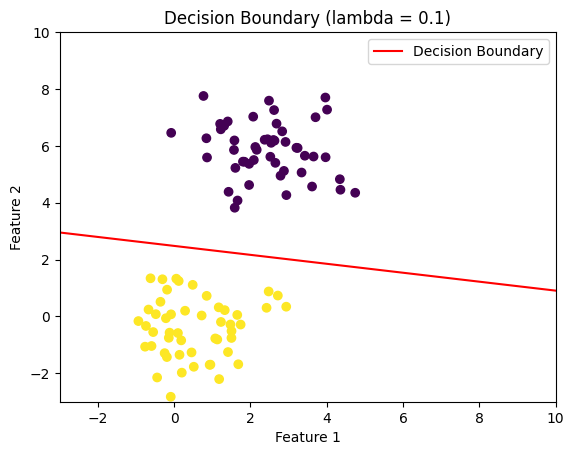

In [18]:
Lambd = 0.1 # Choose a value for our Lambda first! (Range of 0.001 to 1)
num_data_points = X.shape[0] # T equal to the number of data points
w = Pegasos(X, y, Lambd, T=num_data_points)


# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlim((-3, 10))
plt.ylim((-3, 10))

# Decision boundary is defined by w[0]*x + w[1]*y + w[2] = 0
# Rearranging for y: y = (-w[0]/w[1])*x - w[2]/w[1]
x_boundary = np.array([-3, 10])
if w[1]!=0:
   y_boundary = (-w[0]/w[1])*x_boundary - w[2]/w[1]
   plt.plot(x_boundary, y_boundary, color='red', label='Decision Boundary')

plt.title('Decision Boundary (lambda = {})'.format(Lambd))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

**Lambda = 0.001, T = Number of Data Points (100)**

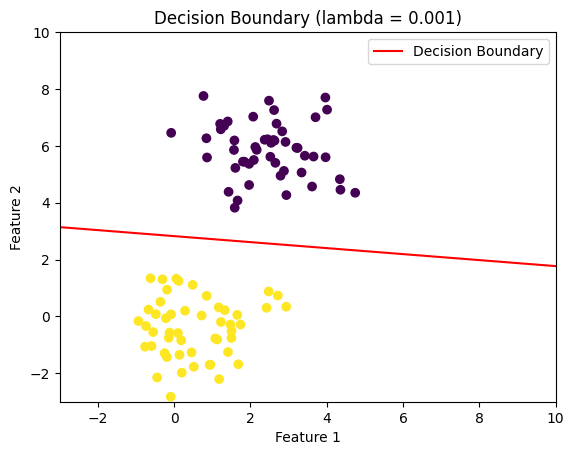

In [158]:
Lambd = 0.001 # Choose a value for our Lambda first! (Range of 0.001 to 1)
num_data_points = X.shape[0] # T equal to the number of data points
w = Pegasos(X, y, Lambd, T=num_data_points)


# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlim((-3, 10))
plt.ylim((-3, 10))

# Decision boundary is defined by w[0]*x + w[1]*y + w[2] = 0
# Rearranging for y: y = (-w[0]/w[1])*x - w[2]/w[1]
x_boundary = np.array([-3, 10])
if w[1]!=0:
   y_boundary = (-w[0]/w[1])*x_boundary - w[2]/w[1]
   plt.plot(x_boundary, y_boundary, color='red', label='Decision Boundary')

plt.title('Decision Boundary (lambda = {})'.format(Lambd))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()